## Observations and Insights

## Dependencies and starter code

## Summary statistics

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df=pd.merge(mouse_metadata,study_results ,on="Mouse ID")


In [2]:
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

df_gb=df.groupby('Drug Regimen')
mean=df_gb['Tumor Volume (mm3)'].mean()
median=df_gb['Tumor Volume (mm3)'].median()
var=df_gb['Tumor Volume (mm3)'].var()
std=df_gb['Tumor Volume (mm3)'].std()
sem=df_gb['Tumor Volume (mm3)'].sem()
table=pd.DataFrame({"Mean":mean,
                   "Median":median,
                   "Variance":var,
                   "Standard Deviation":std,
                   "SEM":sem})
table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

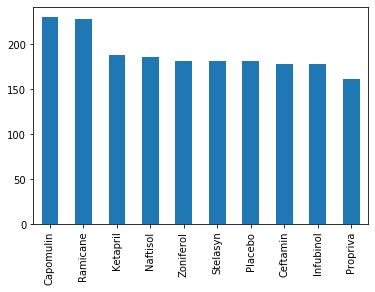

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
df_regimen=df['Drug Regimen'].value_counts()
df_regimen.plot.bar()

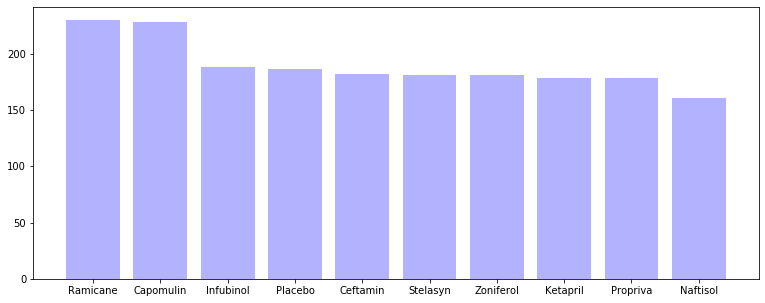

In [72]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#x_axis=np.arange(df['Drug Regimen'])
x_axis=df['Drug Regimen'].unique()
y_axis=df['Drug Regimen'].value_counts()
f, ax = plt.subplots(figsize=(13,5))
plt.bar(x_axis,y_axis,width=0.8,alpha=0.3,align='center',color='b')
plt.show()
#df['Drug Regimen'].value_counts()

## Pie plots

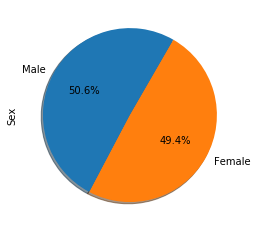

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_mf=df['Sex'].value_counts()
df_mf.plot.pie(autopct="%1.1f%%",shadow=True, startangle=60)

([<matplotlib.patches.Wedge at 0x1a1fd29160>,
 [Text(-0.9629507052921911, 0.5317197938550643, 'Male'),
  Text(0.9629507052921907, -0.5317197938550647, 'Female')],
 [Text(-0.525245839250286, 0.29002897846639863, '50.6%'),
  Text(0.5252458392502858, -0.2900289784663989, '49.4%')])

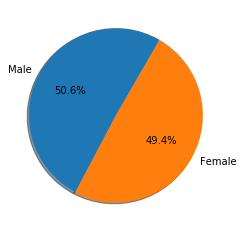

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(df_mf,labels=['Male','Female'],autopct="%1.1f%%",shadow=True, startangle=60)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
df_r=df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
df_rf=df_r.sort_values(ascending=True).head(4)
df_rf



Drug Regimen
Ramicane     40.216745
Capomulin    40.675741
Propriva     52.322552
Ceftamin     52.591172
Name: Tumor Volume (mm3), dtype: float64

In [62]:
df_r=df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
k=df_r['Capomulin']

In [63]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles=df_r.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr= upperq-lowerq
print(f"The value of IQR is{iqr}")

The value of IQR is1.793550057271517


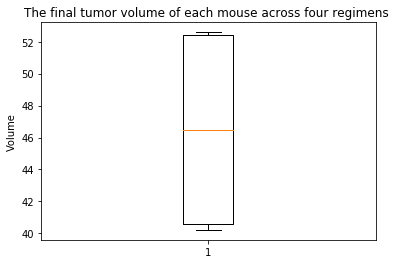

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df_rf=df_r.sort_values(ascending=True).head(4)

fig1, ax1=plt.subplots()
ax1.set_title("The final tumor volume of each mouse across four regimens ")
ax1.set_ylabel("Volume")
ax1.boxplot(df_rf)
plt.show()

## Line and scatter plots

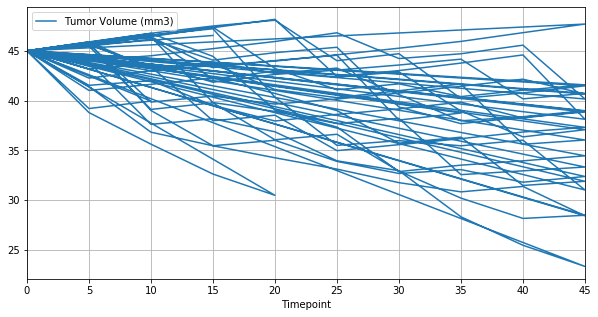

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_c=df.loc[df['Drug Regimen']=='Capomulin']

df_c.set_index('Timepoint').plot(y='Tumor Volume (mm3)',figsize=(10,5),grid=True)

In [12]:
df_cx=df.loc[df['Drug Regimen']=='Capomulin']['Weight (g)'].unique()
df_cx

array([17, 15, 19, 20, 21, 22, 23, 25, 24])

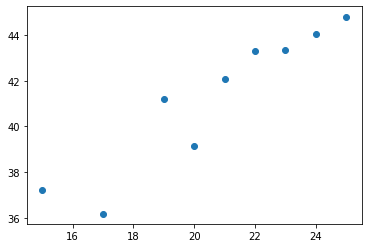

In [13]:
df_c=df.loc[df['Drug Regimen']=='Capomulin']
df_cc=df_c.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
#df_cs=[15,17,19,20,21,22,23,24,25]

plt.scatter(df_cx,df_cc)

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#for the Capomulin regimen
correlation=st.pearsonr(df_cx,df_cc)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.93


In [15]:
x_values=df_cx
y_values=df_cc
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

In [16]:
regress_values = x_values * slope + intercept

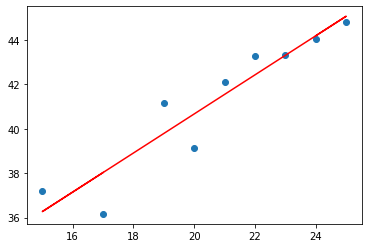

In [17]:

#slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")